# Plotting in Julia

##### Alissa Gordon

## Plotting using 'Plots'

Base Julia does not have functions to create plots, so we'll need to install a package to create plots. Let's start with one of the more basic packages, 'Plots'. Plots is the most commonly used package in Julia for creating plots. It's a good general use package for 2d static plots.

### Using the Plot Function

To create any kind of plot, we can simply use the 'plot' function. The default for plot is to create a line plot, but we can specify what we want with the 'seriestype' argument.

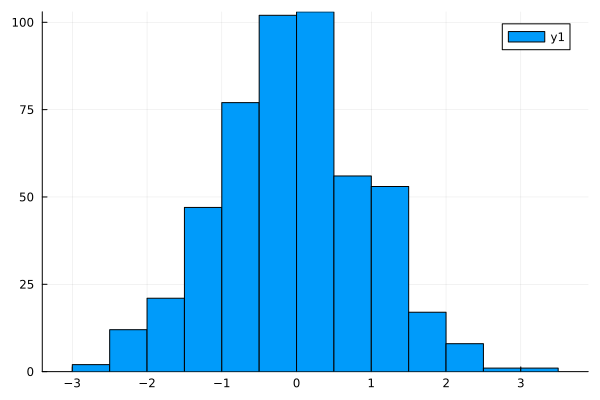

In [19]:
using Plots
x=randn(500)
plot(x, seriestype = :histogram)

Many of the arguments in 'plot' use quoting where predefined values are set (such as histogram). We can these call these coded objects by 'quoting' using ":". Note that the plot function will not recognize these without quoting.

In [20]:
plot(x, seriestype = : histogram)

LoadError: ParseError:
[90m# Error @ [0;0m]8;;file:///Users/alissagordon/Documents/Berkeley/Spring 2025/stat 244/In[20]#1:23\[90mIn[20]:1:23[0;0m]8;;\
plot(x, seriestype = :[48;2;120;70;70m [0;0mhistogram)
[90m#                     ╙ ── [0;0m[91mwhitespace not allowed after `:` used for quoting[0;0m

We can also create any of the seriestype plots by simply using the seriestype as a function:

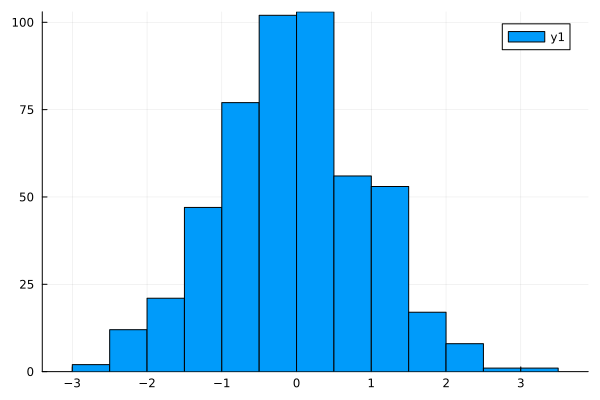

In [21]:
histogram(x)

### Customizing our plots:

#### Aliases 
We can customize plots using attributes. Many of these attributes have what's known as 'aliases', simply meaning there are multiple different names we can use for the same arguments.

In [22]:
plotattr(:Plot)

Defined Plot attributes are:
background_color, background_color_outside, display_type, dpi, extra_kwargs, extra_plot_kwargs, fontfamily, foreground_color, html_output_format, inset_subplots, layout, link, overwrite_figure, plot_title, plot_titlefontcolor, plot_titlefontfamily, plot_titlefonthalign, plot_titlefontrotation, plot_titlefontsize, plot_titlefontvalign, plot_titleindex, plot_titlelocation, plot_titlevspan, pos, show, size, tex_output_standalone, thickness_scaling, warn_on_unsupported, window_title


In [23]:
plotattr(:Series)

Defined Series attributes are:
arrow, bar_edges, bar_position, bar_width, bins, colorbar_entry, connections, contour_labels, contours, extra_kwargs, fill_z, fillalpha, fillcolor, fillrange, fillstyle, group, hover, label, levels, line_z, linealpha, linecolor, linestyle, linewidth, marker_z, markeralpha, markercolor, markershape, markersize, markerstrokealpha, markerstrokecolor, markerstrokestyle, markerstrokewidth, normalize, orientation, permute, primary, quiver, ribbon, series_annotations, seriesalpha, seriescolor, seriestype, show_empty_bins, smooth, stride, subplot, weights, x, xerror, y, yerror, z, z_order, zerror


In [24]:
plotattr("seriescolor")

:seriescolor

The base color for this series. `:auto` (the default) will select a color from the subplot's `color_palette`, based on the order it was added to the subplot. Also describes the colormap for surfaces.

Aliases: (:c, :cmap, :color, :colormap, :colour, :seriescolors).

Type: Union{Integer, Symbol, ColorSchemes.ColorScheme, Colorant}.

`Series` attribute, defaults to `auto`.


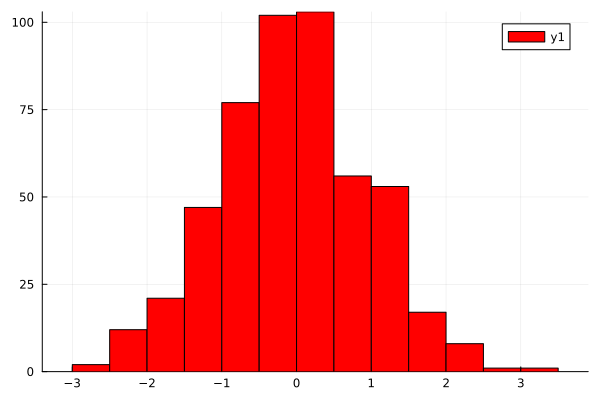

In [25]:
histogram(x, seriescolor=:red)

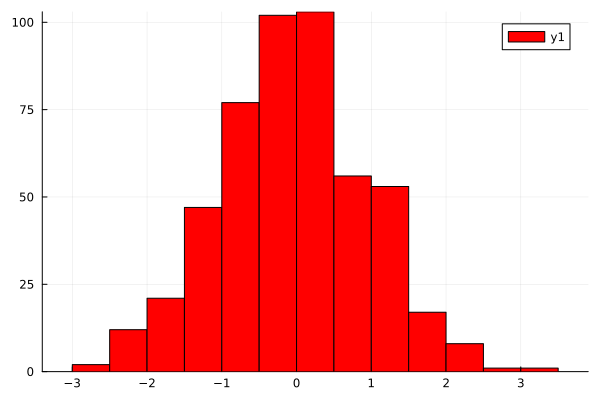

In [26]:
histogram(x, color=:red)

While aliases are convenient, it is recommended to only use them in quick analyses but using the true name for extensive projects.

#### Attributes
Let's go ahead and apply some of the attributes to the histogram. 

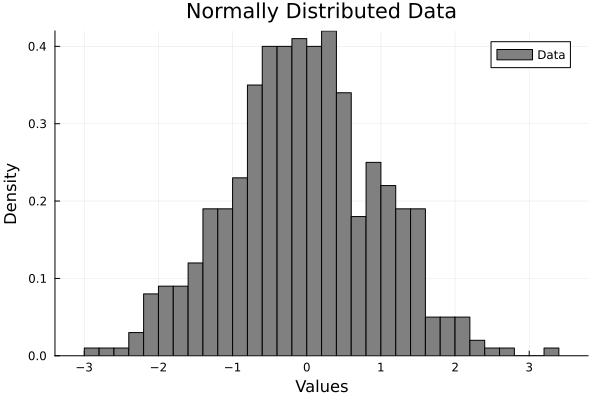

In [27]:
histogram(x, color=:grey, normalize=:pdf, bins=30, title= "Normally Distributed Data", xlab="Values", ylabel="Density", label="Data")

In [28]:
plotattr("normalize")

:normalize

Histogram normalization mode. Possible values are: false/:none (no normalization, default), true/:pdf (normalize to a discrete PDF, where the total area of the bins is 1), :probability (bin heights sum to 1) and :density (the area of each bin, rather than the height, is equal to the counts - useful for uneven bin sizes).

Aliases: (:norm, :normalized, :normalizes, :normed).

Type: Union{Bool, Symbol}.

`Series` attribute, defaults to `false`.


In [29]:
plotattr("label")

:label

The label for a series, which appears in a legend. If empty, no legend entry is added.

Aliases: (:lab, :labels).

Type: AbstractString.

`Series` attribute, defaults to `auto`.


### Modifiers:
We can use any of the plotting functions, followed by !, to modify existing plots (hence the name modifier). The default is to modify the most recently created plot. Let's add on the density curve for a normal distribution.

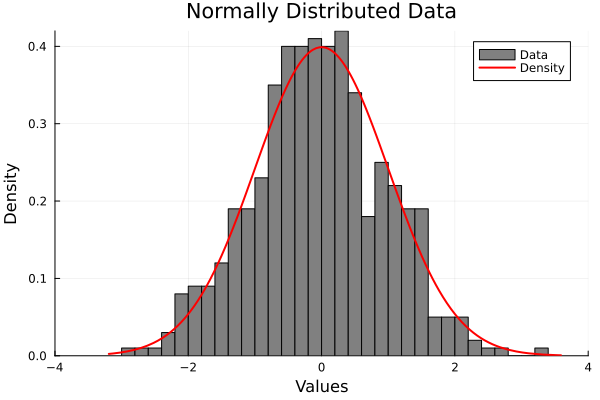

In [30]:
f(x)=1/sqrt(2π)*exp(-(x)^2/2)
plot!(f, label="Density", color=:red, lw=2)
xlims!(-4,4)

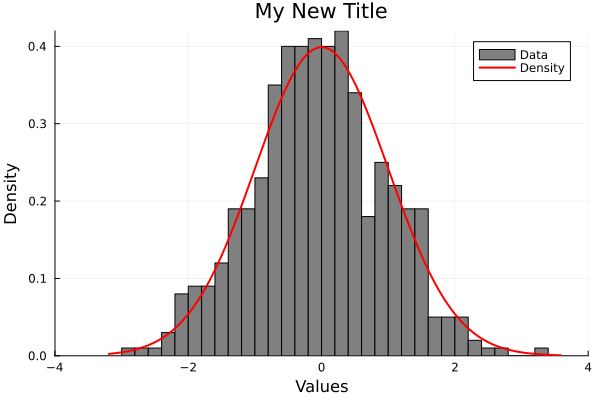

In [31]:
title!("My New Title")

When calling plot!() the default is to call the most recent plot created, but we can also specify which plot to modify.

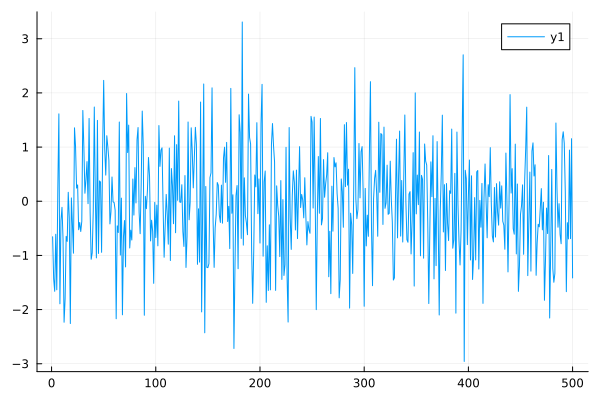

In [32]:
p=histogram(x, normalize=:pdf, bins=30)
plot(x)

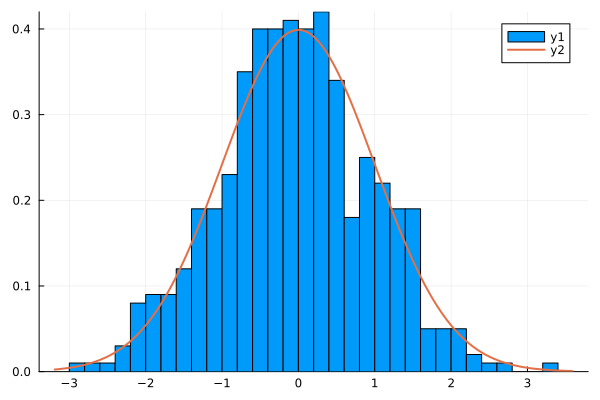

In [33]:
plot!(p, f, lw=2)

### Plotting more than one variable

Since line plots are the default, plotting functions of x and y is straightforward. Note that values are positional arguments.

In [34]:
x=range(-5, 5, length=50)
y= @. x^2 ;

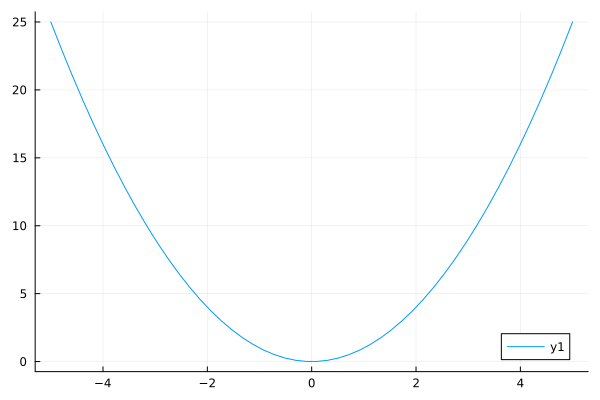

In [35]:
plot(x,y)

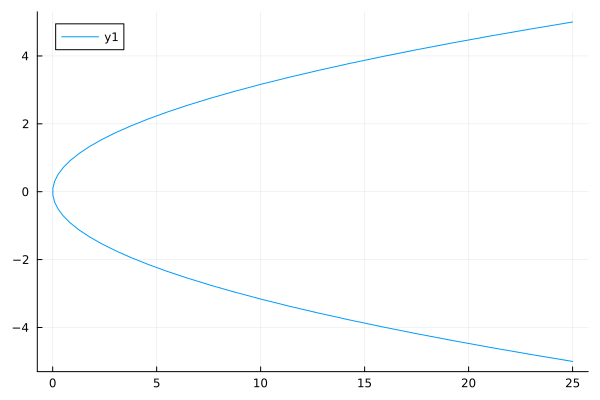

In [36]:
plot(y,x)

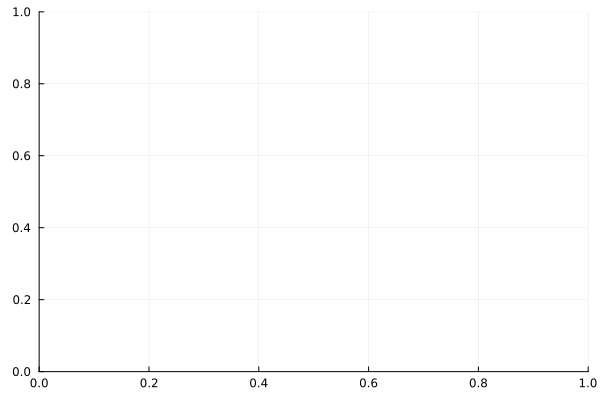

In [37]:
plot(x=x, y=y)

#### Plotting multiple objects on the same plot
We can of course use modifiers to add additional series data, but we can also give julia an array of data series that we are interested in to plot. The data and corresponding labels should be in matrix form.

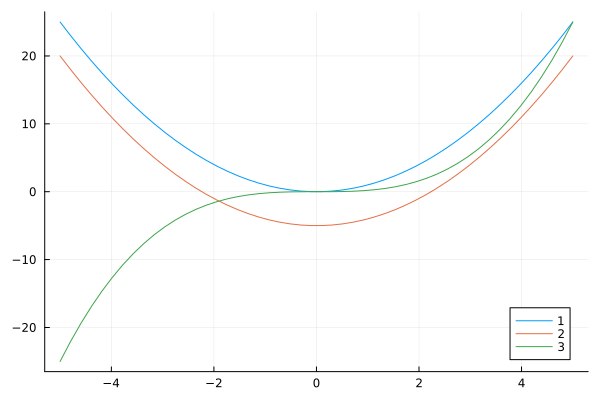

In [38]:
y2 = @. x^2 - 5;
y3= @. 0.2*x^3;
p=plot(x, [y y2 y3], labels=["1" "2" "3"])

If your data series is in a dataframe, simply convert it to a matrix.

In [39]:
using DataFrames
df=DataFrame(l1=y, l2=y2, l3=y3)
first(df, 5)

5×3 DataFrame
 Row │ l1       l2       l3       
     │ Float64  Float64  Float64  
─────┼────────────────────────────
   1 │ 25.0     20.0     -25.0
   2 │ 23.0008  18.0008  -22.062
   3 │ 21.085   16.085   -19.3637
   4 │ 19.2524  14.2524  -16.895
   5 │ 17.5031  12.5031  -14.6455

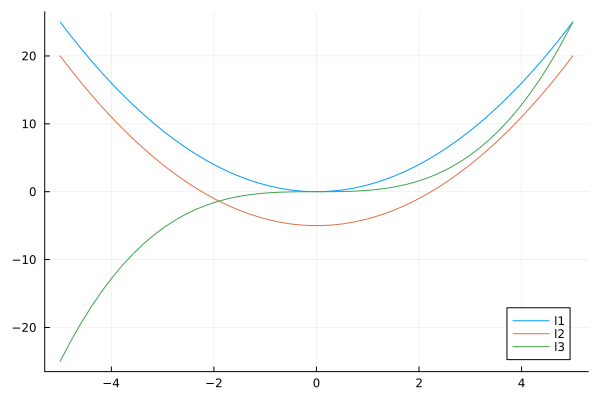

In [40]:
plot(x, Matrix(df),labels=permutedims(names(df)))

### Multipanel plots

It's very easy to combine multiple plots as subplots in Plot.jl using the layout argument. We simply need to define each plot individiually, then combine them within the 'plot' function.

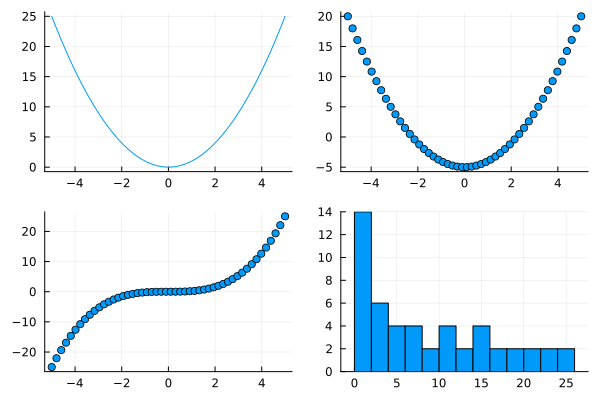

In [41]:
p1=plot(x,y)
p2=scatter(x,y2)
p3=scatter(x,y3)
p4=histogram(y, bins=20)
plot(p1,p2,p3,p4, layout=(2,2), legend=false)

The layout tells julia how many rows and columns to have for the plots. Note that plots are filled in going across rows, not down columns.

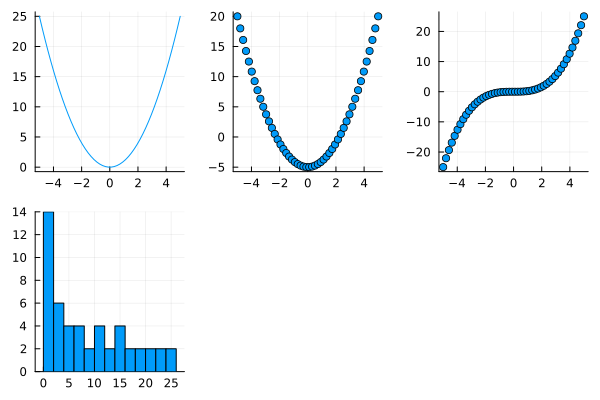

In [42]:
plot(p1,p2,p3,p4,layout=(2,3), legend=false)

If we want our plots to share the same axes, we can use the link argument. 

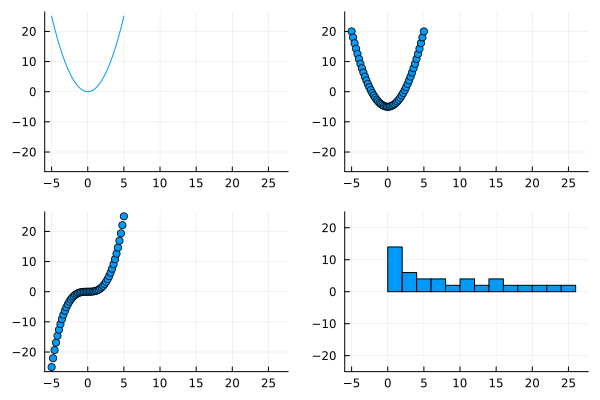

In [43]:
plot(p1,p2,p3,p4, layout=(2,2), link = :all, legend=false)

In [44]:
plotattr("link")

:link

How/whether to link axis limits between subplots. Values: `:none`, `:x` (x axes are linked by columns), `:y` (y axes are linked by rows), `:both` (x and y are linked), `:all` (every subplot is linked together regardless of layout position).

Aliases: (:links,).

Type: Symbol.

`Plot` attribute, defaults to `none`.


Unfortunately, there is no easy way to have multipanel plots based on some other variable like the facet_wrap/facet_grid feature in ggplot. In 'Plots' it is a bit manual compared to the ease of ggplot.

In [45]:
using DataFrames
df = DataFrame(
    x = rand(100),
    y = rand(100),
    category = repeat(['A', 'B'], 50)
);

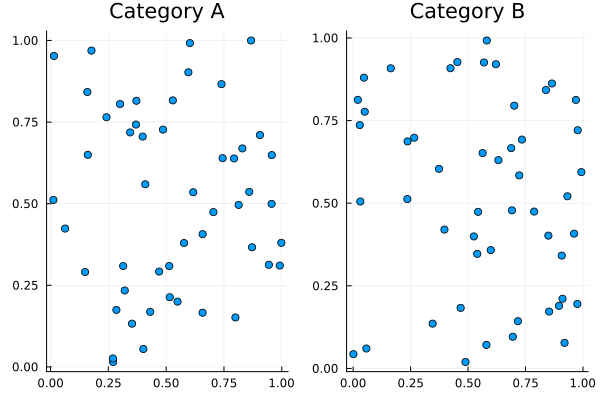

In [46]:
plots = []
categories = unique(df.category)
for cat in categories
    subset = df[df.category .== cat, :]
    push!(plots, scatter(subset.x, subset.y, title="Category $cat", legend=false))
end

final_plot = plot(plots..., layout = (1,2))  
display(final_plot)

### Saving Plots
We can save plots using the savefig function. I recommend setting to a high dpi (default is 100) when creating the plot for high image resolution.

In [47]:
final_plot = plot(plots..., layout = (1,2), dpi=300)  
savefig(final_plot, "plot.png")
savefig(final_plot, "plot.pdf")
savefig(final_plot, "plot.html")

"/Users/alissagordon/Documents/Berkeley/Spring 2025/stat 244/plot.html"

### Other plots we can make in 'Plot'

There are many other plots we can make! We can check this quickly with the plotattr function. 

In [48]:
plotattr("seriestype")

:seriestype

This is the identifier of the type of visualization for this series. Choose from [:none, :line, :path, :steppre, :stepmid, :steppost, :sticks, :scatter, :heatmap, :hexbin, :barbins, :barhist, :histogram, :scatterbins, :scatterhist, :stepbins, :stephist, :bins2d, :histogram2d, :histogram3d, :density, :bar, :hline, :vline, :contour, :pie, :shape, :image, :path3d, :scatter3d, :surface, :wireframe, :contour3d, :volume, :mesh3d] or any series recipes which are defined.

Aliases: (:linetype, :lt, :seriestypes, :st, :t, :typ).

Type: Symbol.

`Series` attribute, defaults to `path`.


### Animating Plots

Plots.jl also allows us to create animated plots through the use of the @animate macro. To create the animation, we need to iterate through a for loop that creates (or updates) a different plot for each frame. If run in Julia, it will just save the gif instead of displaying it like below.

[ Info: Saved animation to /Users/alissagordon/Documents/Berkeley/Spring 2025/stat 244/animated_scatter.gif


Plots.AnimatedGif("/Users/alissagordon/Documents/Berkeley/Spring 2025/stat 244/animated_scatter.gif")
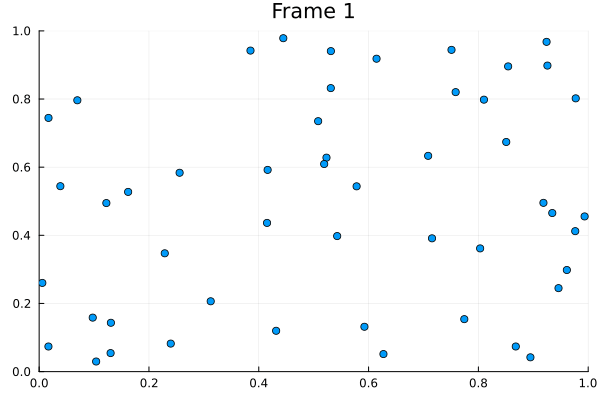

In [49]:
# Number of frames in the animation
frames = 100

# Number of points in the scatter plot
n_points = 50
# Generate random data that evolves over time
xs = [rand(n_points) for _ in 1:frames]
ys = [rand(n_points) for _ in 1:frames]

anim = @animate for i in 1:frames
    scatter(xs[i], ys[i], xlim=(0,1), ylim=(0,1), title="Frame $i", legend=false)
end

gif(anim, "animated_scatter.gif", fps = 15)


[ Info: Saved animation to /Users/alissagordon/Documents/Berkeley/Spring 2025/stat 244/trace_scatterplot.gif


Plots.AnimatedGif("/Users/alissagordon/Documents/Berkeley/Spring 2025/stat 244/trace_scatterplot.gif")
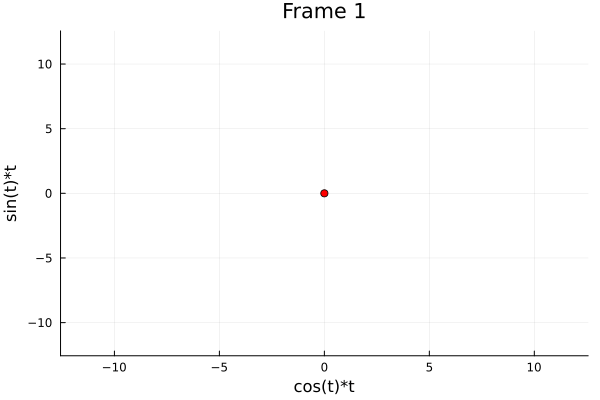

In [50]:
# Number of points
n = 100
# Create a curve, e.g., a spiral
t = range(0, stop=4π, length=n)
x = cos.(t) .* t
y = sin.(t) .* t

anim = @animate for i in 1:n
    scatter(x[1:i], y[1:i], xlim=(-4π, 4π), ylim=(-4π, 4π), color=:red, marker=:circle, legend=false, title="Frame $i", xlab="cos(t)*t", ylab="sin(t)*t")
end

gif(anim, "trace_scatterplot.gif", fps=30)


## Plotting using 'Gadfly'

Gadfly is the most similar Julia package to ggplot in R, making it a comfortable option for those who are used to ggplot. It likewise uses 'grammar of geometries'. Like ggplot, there is a focus on creating easily customizable, professional looking plots. However, these are also interactive.

In [51]:
using DataFrames
df = DataFrame(
    x = rand(100),
    y = rand(100),
    category = rand(["A", "B", "C", "D"], 100)  # Random categories
);
first(df,6)

6×3 DataFrame
 Row │ x          y          category 
     │ Float64    Float64    String   
─────┼────────────────────────────────
   1 │ 0.0658204  0.525073   D
   2 │ 0.0601681  0.676585   B
   3 │ 0.0656347  0.246394   C
   4 │ 0.592897   0.887815   C
   5 │ 0.081992   0.0373575  D
   6 │ 0.617163   0.105615   D

When using gadfly, we specify our mappings by first supplying the dataframe, then quoting the variables within the dataframe we are interested in. Note that if you do not use ":", Julia will not recognize these variables within the dataframe. However, if you are plotting variables directly without a dataframe, you do not need ot quote these.
Further, when providing quantitative values we need to provide these as a vector. 

Note the warning: since we already used the 'Plots' function earlier, we may have issues with naming. Because of this, I will be using Gadfly.plot. In general, I would recommend using the imports function to avoid these naming issues whenever creating plots.

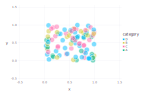

In [52]:
using Gadfly
Gadfly.plot(df,x=:x, y=:y, color=:category,Geom.point,size=[0.05], alpha=[0.5], Theme(background_color="white"))

### Subplots
In gadfly, it is easier to create plots like geom_facet in ggplot by using the subplot_grid argument.

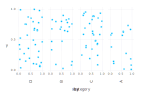

In [53]:
Gadfly.plot(df, xgroup=:category, x=:x, y=:y,
     Geom.subplot_grid(Geom.point))

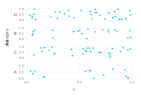

In [54]:
Gadfly.plot(df, ygroup=:category, x=:x, y=:y,
     Geom.subplot_grid(Geom.point))

### Plotting multiple geometries

In ggplot, we typically  specify multiple geometries using '+'. In gadfly, we can just specify in the same plot function the geometries we want to show.

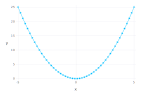

In [55]:
x=range(-5, 5, length=50)
y= @. x^2 ;
Gadfly.plot(x=x, y=y, Geom.point, Geom.line)

If we're interested in plotting different sets of data, we can specify these as layers within the plot function.

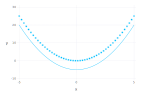

In [56]:
Gadfly.plot(layer(x=x,y=y,Geom.point), 
    layer(x=x,y=y2,Geom.line))

We can manually add legends using the Theme argument and Guide.manual_color_key argument.

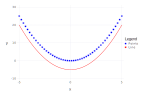

In [57]:
Gadfly.plot(layer(x=x,y=y,Geom.point,Theme(default_color=colorant"blue")), 
    layer(x=x,y=y2,Geom.line,Theme(default_color=colorant"red")),    
    Guide.manual_color_key("Legend", ["Points", "Line"], ["blue", "red"]))


The Cairo package allows us to save pdfs and pngs of Gadfly figures. Note that png files save with a transparent background by default. We can avoid this by setting the background color in the plot function.

In [58]:
using Cairo
p=Gadfly.plot(layer(x=x,y=y,Geom.point,Theme(default_color=colorant"blue")), 
    layer(x=x,y=y2,Geom.line,Theme(default_color=colorant"red")),    
    Guide.manual_color_key("Legend", ["Points", "Line"], ["blue", "red"]))

draw(PDF("gadfly.pdf", 800Gadfly.px, 400Gadfly.px), p)
draw(PNG("gadfly.png", 800Gadfly.px, 400Gadfly.px), p)

In [59]:
p=Gadfly.plot(layer(x=x,y=y,Geom.point,Theme(default_color=colorant"blue")), 
    layer(x=x,y=y2,Geom.line,Theme(default_color=colorant"red")),    
    Guide.manual_color_key("Legend", ["Points", "Line"], ["blue", "red"]),
    Theme(background_color=color("white")))
draw(PNG("gadfly.png", 800Gadfly.px, 400Gadfly.px), p)

## Plotting using 'Makie'

Makie is another popular option in Julia as it offers some advanced capabilities.It allows users to create interactive plots, 3d plots, and many more complex figures!

To use Makie, you need to specify a backend. GLMakie is a popular option for this. It allows for GPU-accelerated, interactive plots. To get the interactive plots, you must run in terminal Julia instead of Jupyter Notebook.

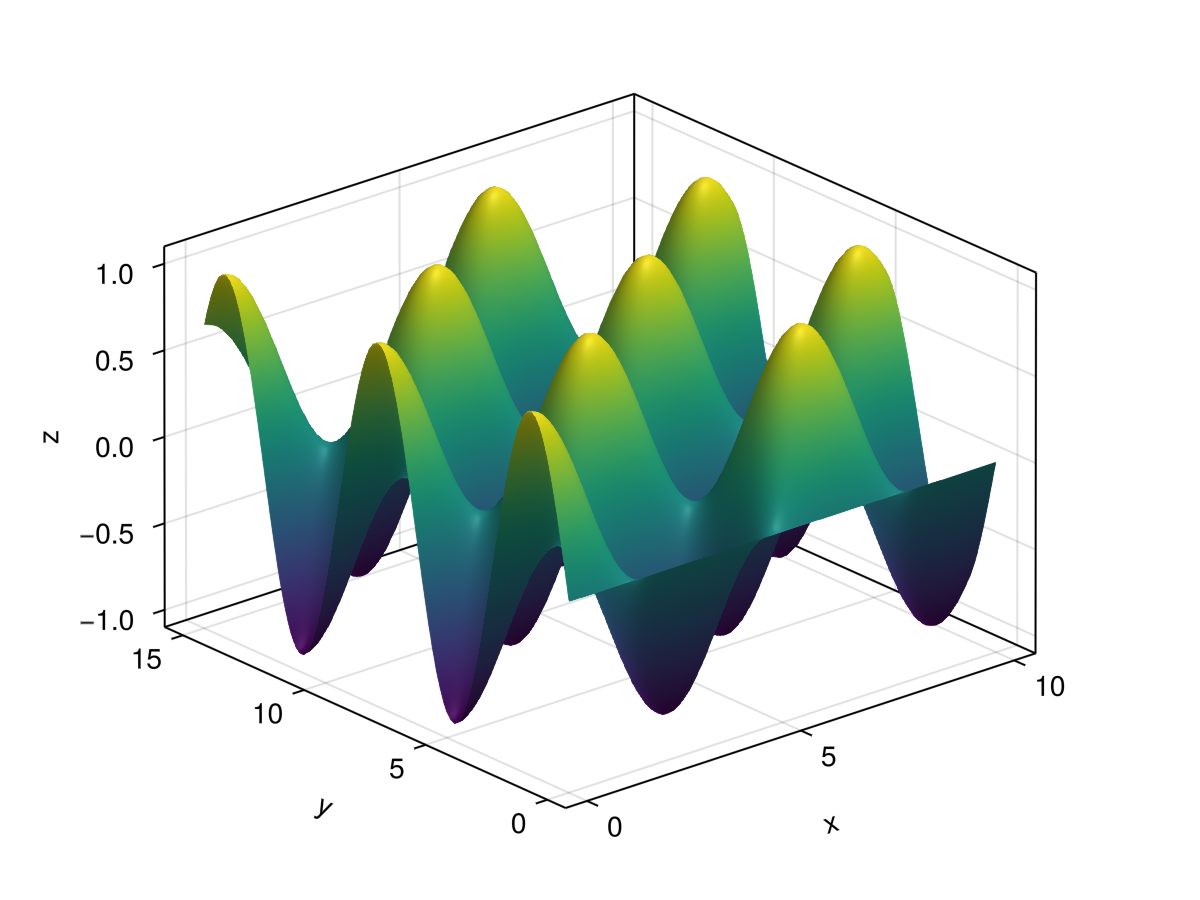

In [60]:
using Makie
using GLMakie #(backend)
GLMakie.activate!()
fig=Figure()
xs = LinRange(0, 10, 100)
ys = LinRange(0, 15, 100)
zs = [cos(x) * sin(y) for x in xs, y in ys]
Makie.surface(xs, ys, zs, axis=(type=Axis3,))

We can save makie plots using GL.Makie.save.

In [61]:
p=Makie.surface(xs, ys, zs, axis=(type=Axis3,))
GLMakie.save("makie.png", p)

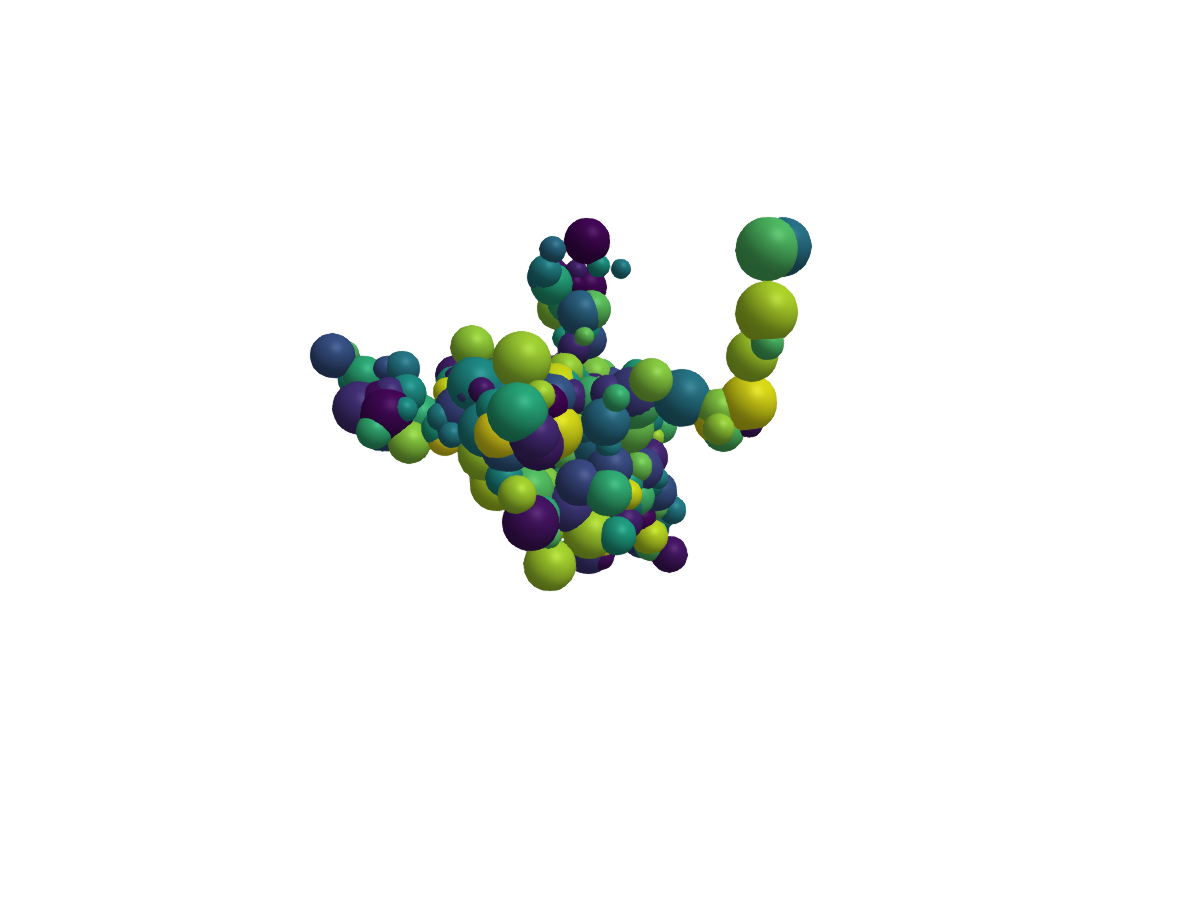

In [62]:
molecule = cumsum(randn(Point3f, 500))

s = Scene(; camera = cam3d!)
meshscatter!(s, molecule, markersize = rand(0.6:0.1:1.5, 500), color = rand(500))
center!(s)
s

## Other packages

Note that other packages exist! We only covered three of the most common/recommended packages, but keep in mind that you may prefer a different package based on your experience/goals. Julia's package site sorts packages by functionality. Below is a link to all of the graphical plotting packages in Julia! 


https://juliapackages.com/c/graphical-plotting